# 1. Perkenalan

## Milestone 2

Ardiansyah Arya Salvinia | Batch 016 RMT

## Objective
Dari dataset ini perusahaan membutuhkan model machine learning yang mampu untuk memprediksi apakah customer akan membatalkan reservasinya atau tidak, berdasarkan dari data riwayat customer.

## Overview Dataset

Dataset Hotel Bookings ini memiliki data riwayat customer baru dan lama, Datanya pun sangat detail, ada tanggal kedatangan, tanggal reservasi, jumlah orang dewasa/anak-anak/bayi, apakah pernah menginap di hotel, segmentasi pasar, dll.

![STEP1](https://media.discordapp.net/attachments/258584857205145600/1045285251229949992/image.png?width=446&height=675)

# 2. Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, chi2, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator
import joblib
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


# Setting Pandas
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 3. Data Loading

In [59]:
# Memuat dataset

df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [60]:
# Melihat 10 data awal
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [61]:
# Melihat 10 data akhir
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# 4. Exploratory Data Analysis

In [62]:
# Melihat informasi overall dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Terdapat 32 kolom yang dimana semua data numerik namun beberapa ada data yang kategorikal namun format binary seperti required_car_parking_spaces dll. 12 kolom adalah kolom kategorikal. Selanjutnya akan dilakukan filtering nama kolom yang numerikal dan kategorikal.

In [63]:
# Mendapatkan kolom numerical dan kolom kategorikal

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', num_columns)
print('Categorical Columns  : ', cat_columns)

Numerical Columns    :  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical Columns  :  ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [64]:
# Melihat nilai unique untuk mendeteksi apakah ada kolom numerikal yang sebenarnya
# kategorikal namun binary

for i in df.columns:
    print(f'Nilai Unique Dari Kolom {i} :',df[i].unique())

Nilai Unique Dari Kolom hotel : ['Resort Hotel' 'City Hotel']
Nilai Unique Dari Kolom is_canceled : [0 1]
Nilai Unique Dari Kolom lead_time : [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 18

Dari hasil code diatas nilai unique pada semua kolom, yang kategorikal menjadi binary hanyalah is_canceled. Berarti tidak ada pemisahan lanjutan.

In [65]:
# Melihat jenis distribusi pada data

jenis_dist = {'Nama Kolom':[], 'Jenis Distribusi':[]}
skewed_list = []
normal_list = []

for i in df[num_columns]:
    # Membuat DataFrame yang akan menampung baris baris yang terdeteksi outlier

    
    # Fungsi if untuk menentukan apakah distribusi data skewed atau normal.
    # Digunakan metoda IQR apabila distribusi data skewed
    if df[i].skew() > 0.5 or df[i].skew() < -0.5:
        dist='Skewed'
        jenis_dist['Nama Kolom'].append(i)
        jenis_dist['Jenis Distribusi'].append(dist)
        skewed_list.append(i)
    # Digunakan metoda Z-score apabila distribusi data normal
    else:
        dist='Normal'
        jenis_dist['Nama Kolom'].append(i)
        jenis_dist['Jenis Distribusi'].append(dist)
        normal_list.append(i)

jenis_df=pd.DataFrame(jenis_dist)
jenis_df


,Nama Kolom,Jenis Distribusi
0,is_canceled,Skewed
1,lead_time,Skewed
2,arrival_date_year,Normal
3,arrival_date_week_number,Normal
4,arrival_date_day_of_month,Normal
5,stays_in_weekend_nights,Skewed
6,stays_in_week_nights,Skewed
7,adults,Skewed
8,children,Skewed
9,babies,Skewed


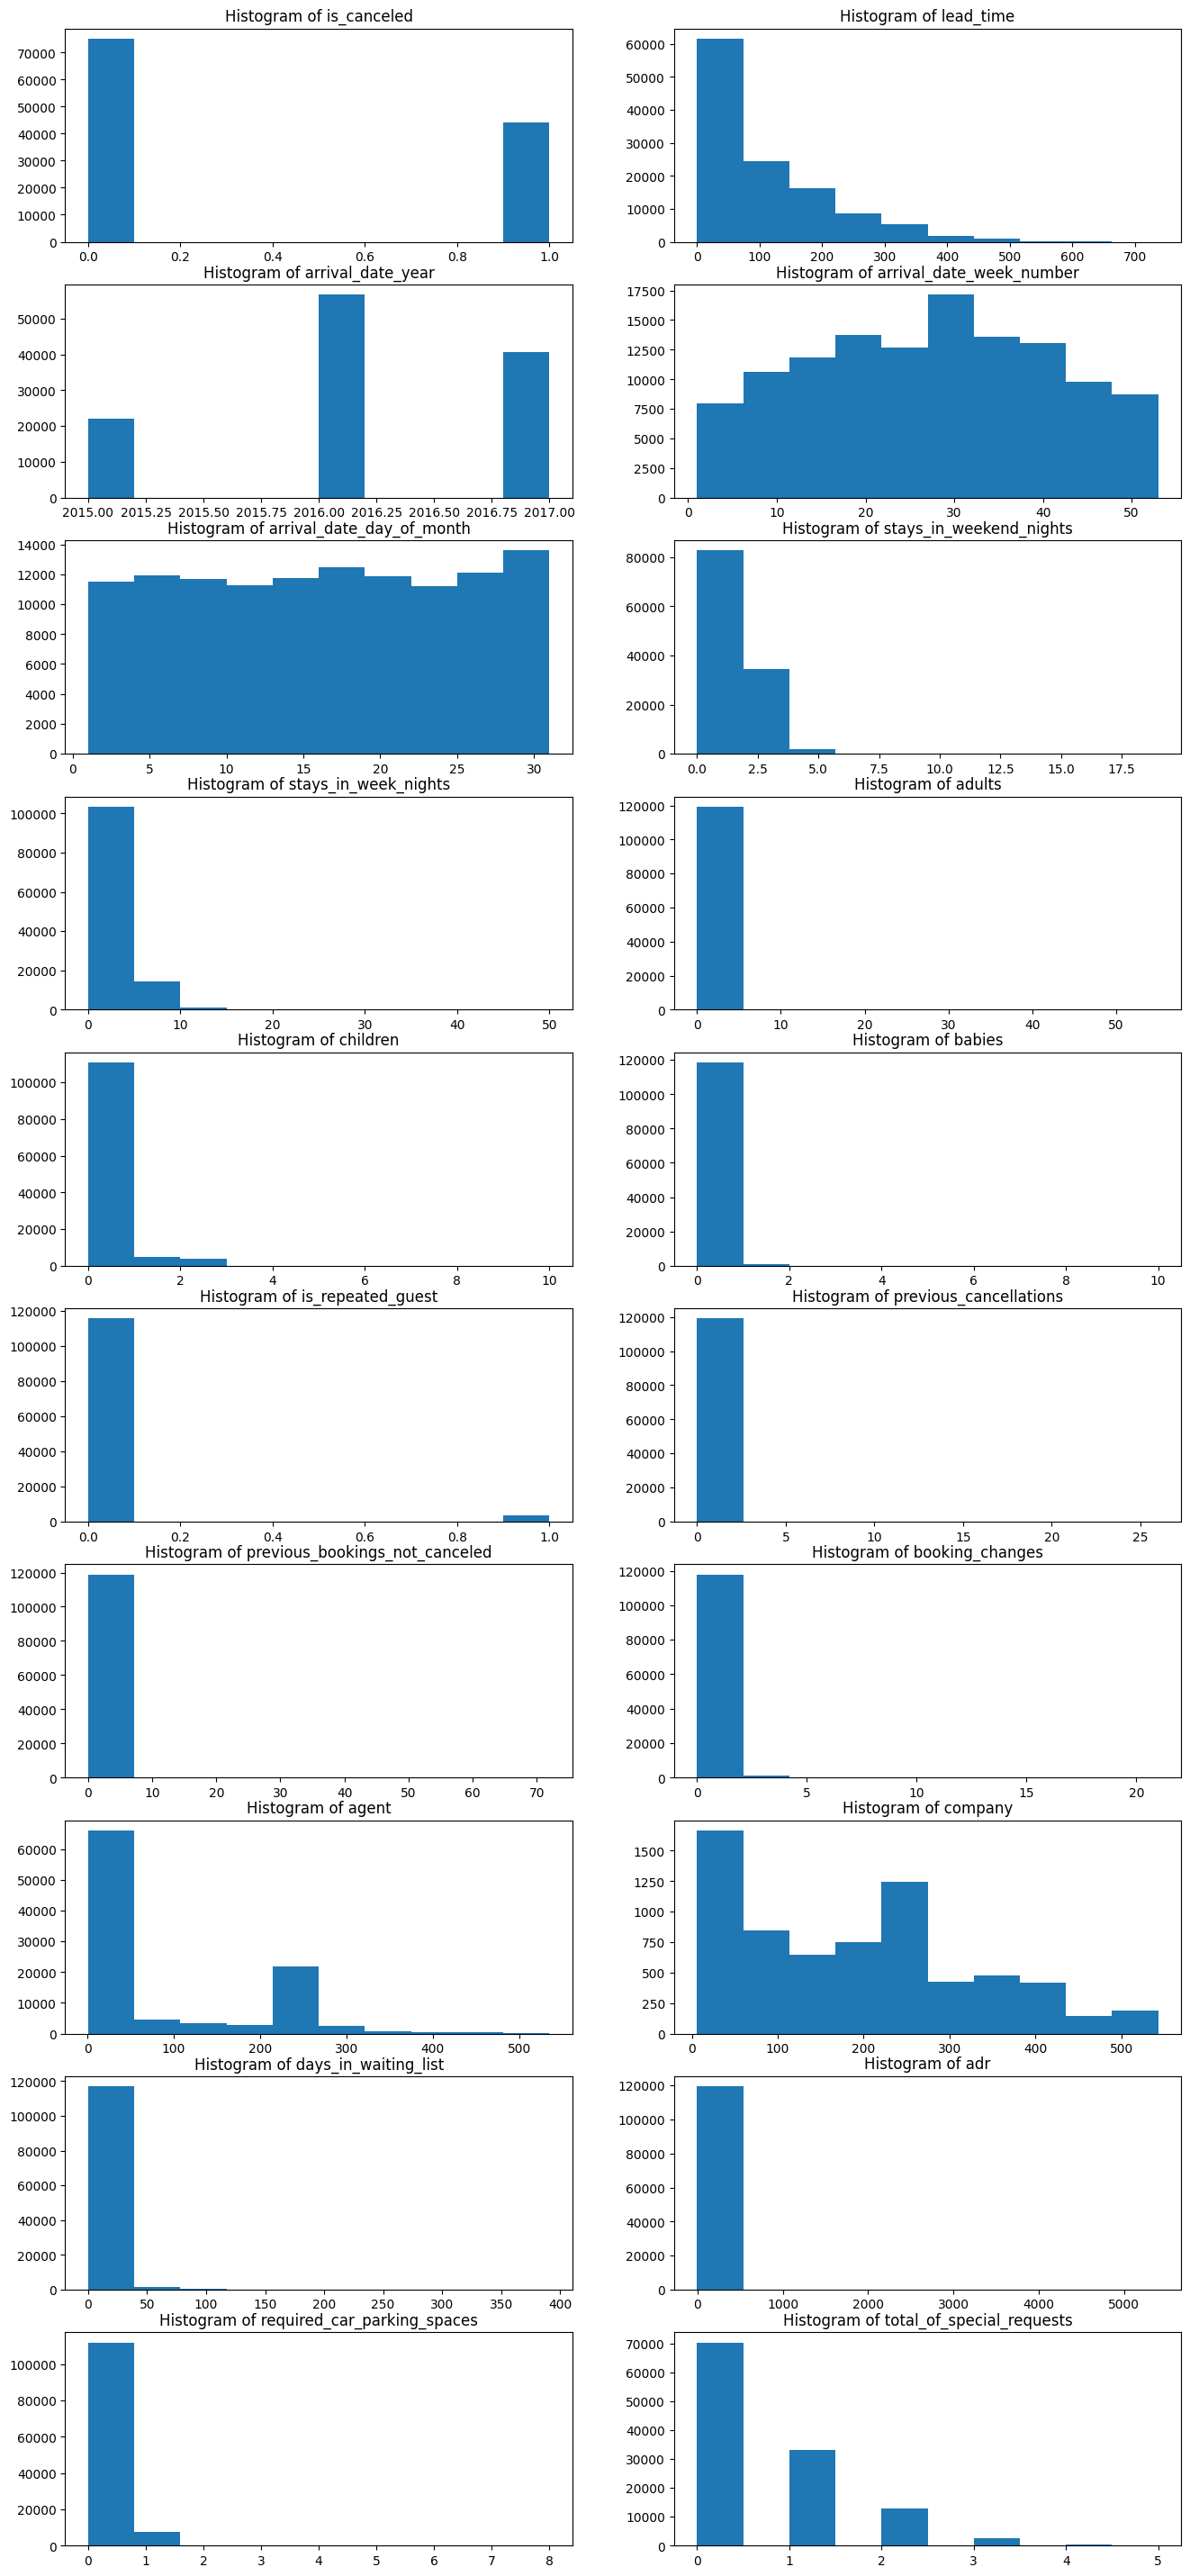

In [66]:
x= 2
y= len(num_columns)//2+1
z=1

plt.figure(figsize=(16, 40))
for i in df[num_columns]:
    plt.subplot(y,x,z)
    plt.hist(df[i])
    plt.title(f'Histogram of {i}')
    z+=1

Dari hasil plotting diatas dan hasil looping distribusi data, terdeteksi 3 distribusi normal dan sisanya skewed. Selanjutnya akan dilihat korelasi kolom numerik dengan kolom is_canceled.

In [67]:
corr=df[num_columns].corr()
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

Dari hasil diatas tidak terlalu terlihat karena angka koresali dibawah 30% semua.

In [68]:
plot = df[num_columns].groupby('is_canceled').mean().reset_index()
plot

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,79.984687,2016.147514,27.080143,15.839529,0.928971,2.464053,1.829737,0.102347,0.010377,0.043344,0.015792,0.202977,0.293364,94.055794,190.519265,1.589868,99.987693,0.0993,0.714060
1,1,144.848815,2016.171920,27.309696,15.728066,0.925267,2.561912,1.901728,0.106513,0.003821,0.012482,0.208348,0.025122,0.098340,75.179927,183.371117,3.564083,104.964333,0.0000,0.328826


Text(0, 0.5, 'Days')

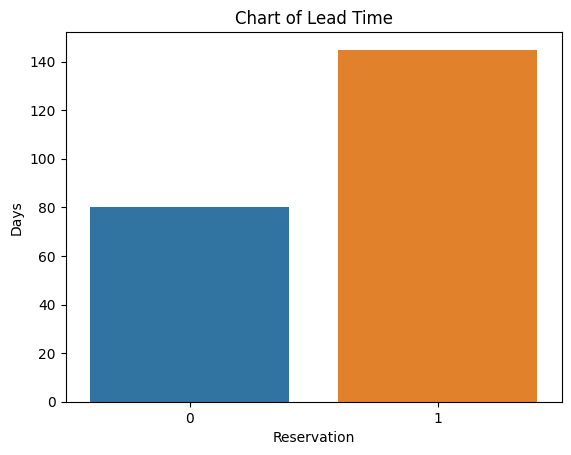

In [69]:
import seaborn as sns

sns.barplot(data=plot, x='is_canceled', y='lead_time')
plt.title('Chart of Lead Time')
plt.xlabel('Reservation')
plt.ylabel('Days')

Semakin lama jarak tanggal booking dengan tanggal check-in nya. Semakin rawan dibatalkan bookingnya.

Text(0, 0.5, 'Rate')

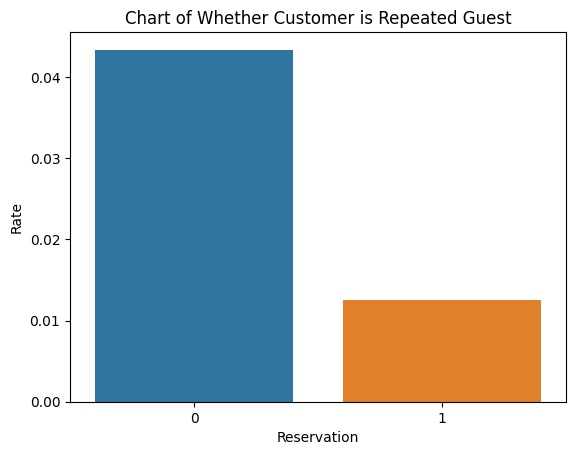

In [138]:
import seaborn as sns

sns.barplot(data=plot, x='is_canceled', y='is_repeated_guest')
plt.title('Chart of Whether Customer is Repeated Guest')
plt.xlabel('Reservation')
plt.ylabel('Rate')

<AxesSubplot: title={'center': 'Total Persons in a Reservation'}, xlabel='Reservation', ylabel='Rate of Person'>

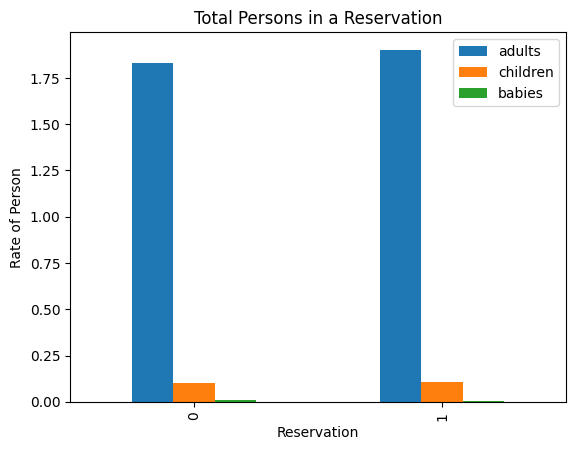

In [70]:
plot.plot(x='is_canceled', y=['adults','children','babies'], kind='bar', ylabel='Rate of Person', title='Total Persons in a Reservation', xlabel='Reservation')

Dari plot diatas jumlah orang dewasa, anak kecil, dan bayi tidak terlalu berpengaruh dengan dibatalkannya pemesanan.

<AxesSubplot: title={'center': 'Reservation Cancelled'}, ylabel='Is Repeated Guest'>

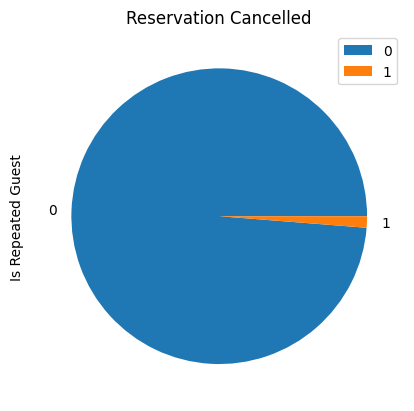

In [71]:
pie1= df['is_repeated_guest'].loc[df['is_canceled'] == 1].reset_index()
pie1.drop('index', axis=1, inplace=True)
pie1_df=pd.DataFrame(pie1.value_counts().reset_index())
pie1_df.plot.pie(y=0,ylabel='Is Repeated Guest', title='Reservation Cancelled')


In [132]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<AxesSubplot: title={'center': 'Target Distribution'}, ylabel='Cancellation'>

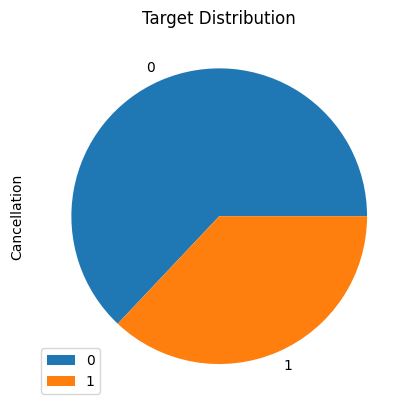

In [136]:
balance = df['is_canceled'].value_counts().reset_index()
balance.drop("index", axis=1, inplace=True)
balance.plot.pie(y=0,ylabel='Cancellation',title='Target Distribution')

<AxesSubplot: title={'center': 'Reservation Not Cancelled'}, ylabel='Is Repeated Guest'>

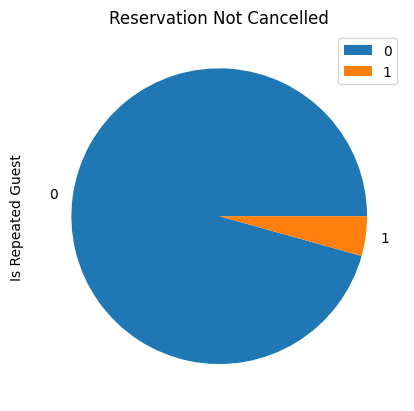

In [72]:
pie2= df['is_repeated_guest'].loc[df['is_canceled'] == 0].reset_index()
pie2.drop('index', axis=1, inplace=True)
pie2_df=pd.DataFrame(pie2.value_counts().reset_index())
pie2_df.plot.pie(y=0,ylabel='Is Repeated Guest',title='Reservation Not Cancelled')

Nilai tidak terlalu siginifikan perbedaannya, namun konsumen yang pernah menginap di hotel lebih rendah kemungkinannya untuk membatalkan pesanan.

In [73]:
plot

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,79.984687,2016.147514,27.080143,15.839529,0.928971,2.464053,1.829737,0.102347,0.010377,0.043344,0.015792,0.202977,0.293364,94.055794,190.519265,1.589868,99.987693,0.0993,0.714060
1,1,144.848815,2016.171920,27.309696,15.728066,0.925267,2.561912,1.901728,0.106513,0.003821,0.012482,0.208348,0.025122,0.098340,75.179927,183.371117,3.564083,104.964333,0.0000,0.328826


<AxesSubplot: xlabel='is_canceled', ylabel='Rate'>

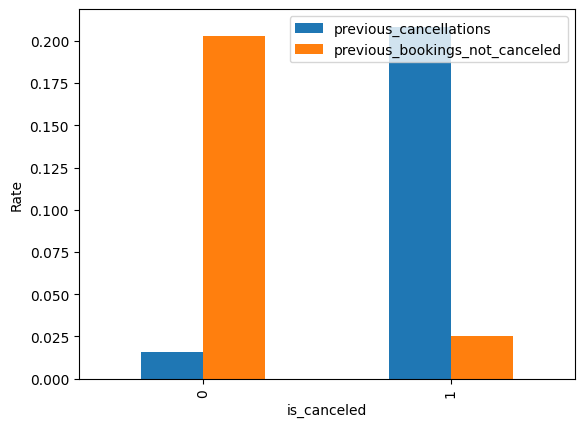

In [74]:
plot.plot(x='is_canceled', y=['previous_cancellations','previous_bookings_not_canceled'], kind='bar', ylabel='Rate')

Bila melihat riwayat jumlah pembatalan dari 1 customer, semakin banyak histori pembatalan konsumen semakin besar kemungkinan pesanan dibatalkan.

<AxesSubplot: title={'center': 'Rate of Booking Changes'}, xlabel='Reservation', ylabel='Rate'>

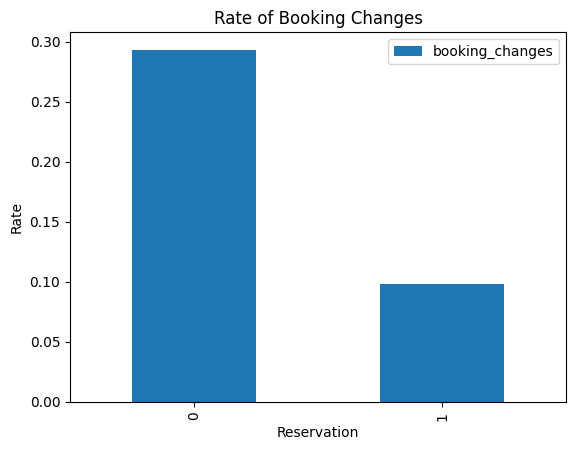

In [75]:
plot.plot(x='is_canceled', y=['booking_changes'], kind='bar', title='Rate of Booking Changes', ylabel='Rate',xlabel='Reservation')

Pada umumnya konsumen yang banyak mengubah pesanan memiliki kemungkinan besar tidak akan membatalkan pesanan.

<AxesSubplot: title={'center': 'Average Day in Waiting List'}, xlabel='is_canceled', ylabel='Days'>

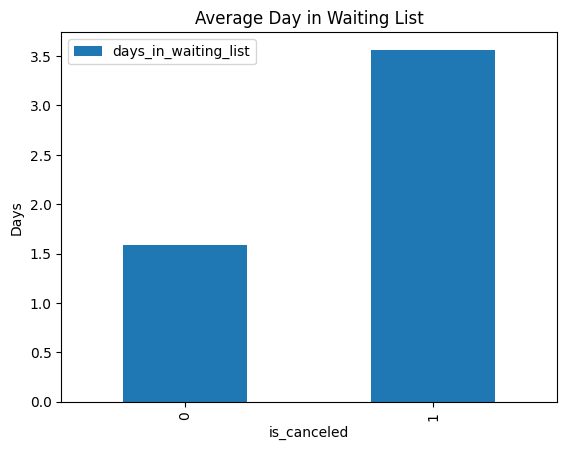

In [76]:
plot.plot(x='is_canceled', y=['days_in_waiting_list'], kind='bar', ylabel='Days', title='Average Day in Waiting List')

Semakin lama konsumen masuk ke waiting list, semakin besar kemungkinan untuk konsumen membatalkan pesanan.

In [77]:
day=df[{'is_canceled','arrival_date_day_of_month'}].value_counts().reset_index()
day

,arrival_date_day_of_month,is_canceled,0
0,25,0,2680
1,2,0,2670
2,18,0,2642
3,5,0,2638
4,19,0,2583
...,...,...,...
57,29,1,1262
58,10,1,1186
59,11,1,1179
60,23,1,1176


<AxesSubplot: title={'center': 'Chart of Rate Special Request'}, xlabel='Reservation', ylabel='Rate of Special Requests'>

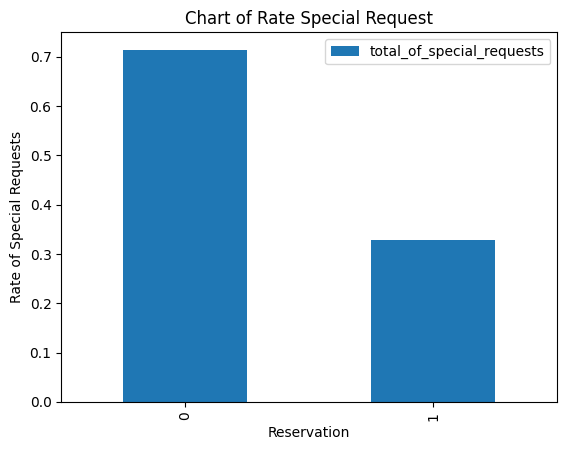

In [78]:
plot.plot(x='is_canceled', y='total_of_special_requests', kind='bar', ylabel='Rate of Special Requests', title='Chart of Rate Special Request', xlabel='Reservation')

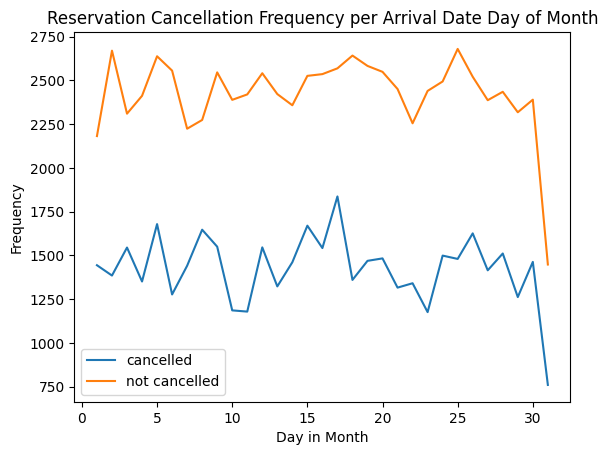

In [79]:
y1=day[{'arrival_date_day_of_month',0}].loc[day['is_canceled']==1].sort_values('arrival_date_day_of_month')
y2=day[{'arrival_date_day_of_month',0}].loc[day['is_canceled']==0].sort_values('arrival_date_day_of_month')
plt.plot(y1['arrival_date_day_of_month'],y1[0], label='cancelled')
plt.plot(y2['arrival_date_day_of_month'],y2[0], label='not cancelled')
plt.xlabel('Day in Month')
plt.ylabel('Frequency')
plt.title('Reservation Cancellation Frequency per Arrival Date Day of Month')
plt.legend()

In [80]:
a=day['arrival_date_day_of_month'].loc[(day[0] ==day[0].max()) & (day['is_canceled']==1)].tolist()
a

[]

In [81]:
day1= day.loc[day['is_canceled'] == 1]
day0= day.loc[day['is_canceled'] == 0]

max1= day1['arrival_date_day_of_month'].loc[day1[0]==day1[0].max()].tolist()
max0= day0['arrival_date_day_of_month'].loc[day0[0]==day0[0].max()].tolist()

print(f'Hari ke {max1} adalah Hari yang paling rawan pembatalan reservasi untuk hotel')
print(f'Hari ke {max0} adalah Hari yang paling aman dari pembatalan reservasi untuk hotel')

Hari ke [17] adalah Hari yang paling rawan pembatalan reservasi untuk hotel
Hari ke [25] adalah Hari yang paling aman dari pembatalan reservasi untuk hotel


In [82]:
week=df[{'is_canceled','arrival_date_week_number'}].value_counts().reset_index()
week

,arrival_date_week_number,is_canceled,0
0,33,0,2075
1,34,0,1996
2,32,0,1879
3,30,0,1844
4,28,0,1804
...,...,...,...
101,48,1,375
102,52,1,354
103,1,1,353
104,3,1,335


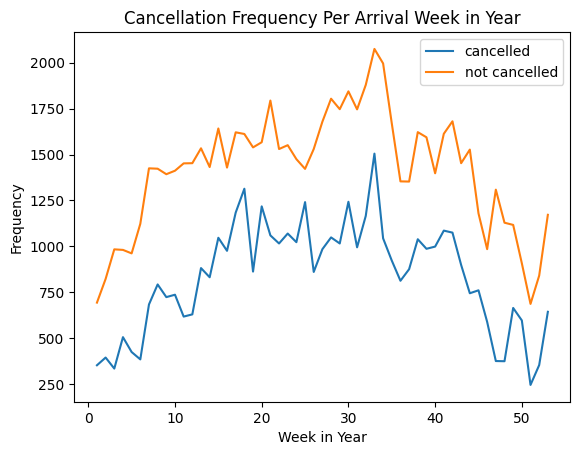

In [83]:
y1=week[{'arrival_date_week_number',0}].loc[week['is_canceled']==1].sort_values('arrival_date_week_number')
y2=week[{'arrival_date_week_number',0}].loc[week['is_canceled']==0].sort_values('arrival_date_week_number')
plt.plot(y1['arrival_date_week_number'],y1[0], label='cancelled')
plt.plot(y2['arrival_date_week_number'],y2[0], label='not cancelled')
plt.xlabel('Week in Year')
plt.ylabel('Frequency')
plt.title('Cancellation Frequency Per Arrival Week in Year')
plt.legend()

In [84]:
week1= week.loc[week['is_canceled'] == 1]
week0= week.loc[week['is_canceled'] == 0]

max1= week1['arrival_date_week_number'].loc[week1[0]==week1[0].max()].tolist()
max0= week0['arrival_date_week_number'].loc[week0[0]==week0[0].max()].tolist()

print(f'Minggu ke {max1} adalah minggu yang paling rawan pembatalan reservasi untuk hotel')
print(f'Minggu ke {max0} adalah minggu yang paling aman dari pembatalan reservasi untuk hotel')

Minggu ke [33] adalah minggu yang paling rawan pembatalan reservasi untuk hotel
Minggu ke [33] adalah minggu yang paling aman dari pembatalan reservasi untuk hotel


Ternyata hari minggu 33 adalah minggu yang paling banyak konsumen datang, namun kemungkinan konsumen membatalkan pesanan pula sangat tinggi.

Kesimpulan dari semua data numerik tidak ada yang terlalu berkorelasi dengan pembatalannya reservasi di hotel. Namun dapat ditarik kesimpulan 

-  Semakin lama jarak tanggal booking dengan tanggal check-in nya. Semakin rawan dibatalkan reservasi.
-  Semakin lama reservasi dimasukan ke waiting list semakin besar reservasi dibatalkan.
-  Jumlah orang dewasa balita dan anak anak tidak terlalu berpengaruh pada pembatalannya reservasi.
-  Semakin banyak riwayat pembatalan semakin tinggi kemungkinan konsumen tersebut akan melakukan pembatalan pada reservasi.
-  Anehnya konsumen yang sering mengganti jadwal reservasi malah berkemungkinan tinggi tidak melakukan pembatalan.
- Untuk per tahunnya kebanyakan konsumen menginap di hotel pada minggu ke 33.


Selanjutnya akan dilakukan preprocessing.

# 5. Pre Processing

## Memisahkan data inference dari dataset

In [85]:
# Mengambil data inference

inf = df.sample(10, random_state=10)
inf

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2125,Resort Hotel,0,46,2015,October,40,2,2,5,2,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,D,D,1,No Deposit,71.0,NaN,0,Transient,55.43,0,0,Check-Out,2015-10-09
84565,City Hotel,0,6,2016,February,9,25,0,3,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient,62.00,0,1,Check-Out,2016-02-28
84972,City Hotel,0,4,2016,March,11,6,1,0,2,0.0,0,BB,BRA,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,82.00,0,0,Check-Out,2016-03-07
43746,City Hotel,0,86,2015,September,39,24,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,B,1,No Deposit,12.0,NaN,0,Transient-Party,87.50,0,0,Check-Out,2015-09-26
64881,City Hotel,1,13,2017,March,12,19,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,118.00,0,0,Canceled,2017-03-07
60306,City Hotel,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,100.00,0,0,Canceled,2016-04-04
26451,Resort Hotel,0,65,2016,July,31,29,1,2,2,0.0,0,BB,FIN,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,242.0,NaN,0,Transient,192.67,0,1,Check-Out,2016-08-01
60087,City Hotel,1,95,2016,November,45,5,0,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,75.00,0,0,Canceled,2016-10-21
11760,Resort Hotel,1,247,2017,May,22,28,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,80.10,0,0,Canceled,2016-09-23
84594,City Hotel,0,47,2016,February,9,26,1,2,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,81.50,1,1,Check-Out,2016-02-29


Data inference telah diperoleh selanjutnya akan ditrim dari dataset utama.

In [86]:
# Menghapus data inference dari dataset

df_trim = df.drop(inf.index).reset_index(drop=True)
inf.reset_index(drop=True, inplace=True)
df_trim

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119376,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119377,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119378,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Data berhasil terpisah selanjutnya akan dilakukan pemisahan feature dan target.

In [87]:
# Memisahkan data feature `X` dan target `y`

X = df_trim.drop('is_canceled', axis=1)
X_inf = inf.drop('is_canceled', axis=1)
y = df_trim['is_canceled']
y_inf = inf['is_canceled']

X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,City Hotel,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119376,City Hotel,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119377,City Hotel,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119378,City Hotel,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [88]:
# Melihat data target
y

0         0
1         0
2         0
3         0
4         0
         ..
119375    0
119376    0
119377    0
119378    0
119379    0
Name: is_canceled, Length: 119380, dtype: int64

Data feature dan target sudah terpisah selanjutnya akan split data train-test.

In [89]:
# Karena ada data null pada country akan dimasukan data `NIP` atau not inputted
X['country'].fillna('NIP',inplace=True)
len(X['country'].unique())

# Karena terlalu besar kategorinya country akan di drop, dikarenakan membuat train
# test splitnya imbalance
X.drop('country', axis=1, inplace=True)

## Split Train-Test Set

In [90]:
# Memisahkan data train-set dengan test-set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
# Stratify country karena banyak kategorinya

# Copy train-set untuk latihan pipeline
X_train_pipe = X_train.copy(deep = True)
y_train_pipe = y_train.copy(deep = True)

print('Shape dari X_train :', X_train.shape)
print('Shape dari y_train :', y_train.shape)
print('Shape dari X_test :', X_test.shape)
print('Shape dari y_test :', y_test.shape)

Shape dari X_train : (95504, 30)
Shape dari y_train : (95504,)
Shape dari X_test : (23876, 30)
Shape dari y_test : (23876,)


Setelah terpisah kita akan melakukan pengecekan class apakah dataset imbalance atau tidak.

In [91]:
# Melihat distribusi target
y.value_counts()

0    75160
1    44220
Name: is_canceled, dtype: int64

Ternyata dataset imbalance . Selanjutnya, diketahui ada data date pada kolom reservation_status_date akan dipisahkan terlebih dahulu untuk proses scaling.

In [92]:
# Melakukan proses drop pada kolom reservation_status_date
X_train = X_train.drop('reservation_status_date', axis =1)
X_test = X_test.drop('reservation_status_date', axis =1)
X_train = X_train.drop('reservation_status', axis =1)
X_test = X_test.drop('reservation_status', axis =1)



X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
85454,City Hotel,2,2016,March,12,17,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,1,A,A,0,No Deposit,NaN,179.0,0,Transient,79.00,0,1
22101,Resort Hotel,0,2016,March,12,17,0,1,2,0.0,0,BB,Direct,Direct,0,0,0,A,A,1,No Deposit,NaN,NaN,0,Transient,45.00,0,0
55583,City Hotel,184,2016,August,34,17,0,1,2,0.0,0,HB,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,9.0,NaN,0,Transient-Party,139.50,0,1
40234,City Hotel,103,2015,July,29,18,2,1,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,17.0,NaN,0,Transient-Party,94.50,0,0
85415,City Hotel,46,2016,March,11,10,2,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,77.35,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35112,Resort Hotel,84,2017,April,15,13,0,1,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,251.0,NaN,0,Transient,80.00,0,0
113043,City Hotel,108,2017,June,22,1,0,1,2,0.0,0,SC,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0
11495,Resort Hotel,233,2017,May,19,11,2,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,54.00,0,1
97294,City Hotel,346,2016,September,38,13,0,2,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,NaN,0,Transient-Party,115.00,0,1


Data train dan test sudah berhasil terpisah. Selanjutnya akan dilakukan handling missing values.

## Missing Values Handling

In [93]:
# Mendeteksi apakah ada nilai missing values

X_train.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13124
company                           90079
days_in_waiting_list                  0
customer_type                         0


Karena hasil EDA menunjukkan data tidak terlalu berkorelasi dengan target. Akan penulis hilangkan featurenya, namun akan penulis tampilkan dulu tabel korelasi dibawah.

In [94]:
# Menampilkan tabel korelasi

corr['is_canceled']

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

Dari tabel diatas nilai korelasinya -0.02 dan -0.08 yang bisa dinilai sangat kecil pengaruhnya. Oleh karena itu dilakukan proses trimming pada dataset.

In [95]:
# Melakukan trimming pada data feature
X_train = X_train.drop({'agent','company'},axis = 1)
X_test = X_test.drop({'agent','company'}, axis = 1)

# Melihat data train yang sudah di trim
X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
85454,City Hotel,2,2016,March,12,17,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,1,A,A,0,No Deposit,0,Transient,79.00,0,1
22101,Resort Hotel,0,2016,March,12,17,0,1,2,0.0,0,BB,Direct,Direct,0,0,0,A,A,1,No Deposit,0,Transient,45.00,0,0
55583,City Hotel,184,2016,August,34,17,0,1,2,0.0,0,HB,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,0,Transient-Party,139.50,0,1
40234,City Hotel,103,2015,July,29,18,2,1,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,94.50,0,0
85415,City Hotel,46,2016,March,11,10,2,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,77.35,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35112,Resort Hotel,84,2017,April,15,13,0,1,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,80.00,0,0
113043,City Hotel,108,2017,June,22,1,0,1,2,0.0,0,SC,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.00,0,0
11495,Resort Hotel,233,2017,May,19,11,2,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,54.00,0,1
97294,City Hotel,346,2016,September,38,13,0,2,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,115.00,0,1


In [96]:
# Selanjutnya akan melihat data null yang lainnya

X_train[X_train['children'].isna()]


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40664,City Hotel,1,2015,August,32,5,0,2,2,NaN,0,BB,Direct,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.0,0,1
41157,City Hotel,8,2015,August,33,13,2,5,2,NaN,0,BB,Online TA,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,76.5,0,1
40676,City Hotel,1,2015,August,32,5,0,2,3,NaN,0,BB,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,18.0,0,2


Karena tidak terspesifikasi penulis melakukan asumsi kalau tidak akan membawa anak-anak. Oleh karena itu nilai di replace dengan angka 0.

In [97]:
# Melakukan replace data null pada kolom children
X_train['children'].fillna(0, inplace=True)
X_test['children'].fillna(0,inplace=True)

# Melihat data null
X_train.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

Missing Values telah terhandling selanjutnya akan dilakukan handling outlier

## Handling Outlier

In [98]:
# Membuat fungsi pendeteksian outlier

dist=[]
unique_outlier = pd.DataFrame()

outlier = 0
y=0
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()

# Membuat list yang akan menampung nama kolom tergantung jenis distribusi
normal_dist= []
skewed_dist= []

# Membuat dictionary yang akan menampung nama kolom, jumlah outlier dan jenis distribusi
outlier_dict= {'Nama Kolom':[],'Jumlah Outlier':[],'Jenis Distribusi':[]}

# Fungsi loop yang digunakan untuk mendeteksi jumlah outlier sesuai dengan distribusi datanya.

for i in X_train[num_columns]:
    # Membuat DataFrame yang akan menampung baris baris yang terdeteksi outlier
    baris = pd.DataFrame()
    
    # Fungsi if untuk menentukan apakah distribusi data skewed atau normal.
    # Digunakan metoda IQR apabila distribusi data skewed
    if X_train[i].skew() > 0.5 or X_train[i].skew() < -0.5:
        dist='Skewed'
        IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
        lower_boundary = X_train[i].quantile(0.25) - (IQR * 3)
        upper_boundary = X_train[i].quantile(0.75) + (IQR * 3)
        y = len(X_train[X_train[i] > upper_boundary]) + len(X_train[X_train[i] <lower_boundary])
        outlier_dict['Nama Kolom'].append(i)
        outlier_dict['Jumlah Outlier'].append(y)
        outlier_dict['Jenis Distribusi'].append(dist)
        skewed_dist.append(i)
    # Digunakan metoda Z-score apabila distribusi data normal
    else:
        dist='Normal'
        upper_boundary = X_train[i].mean() + 3 * X_train[i].std()
        lower_boundary = X_train[i].mean() - 3 * X_train[i].std()
        y = len(X_train[X_train[i] > upper_boundary]) + len(X_train[X_train[i] <lower_boundary])
        outlier_dict['Nama Kolom'].append(i)
        outlier_dict['Jumlah Outlier'].append(y)
        outlier_dict['Jenis Distribusi'].append(dist)
        normal_dist.append(i)
        

    # Menyimpan data index outlier agar mempermudah dan meringankan looping saat memasukan data outlier pada list baris
    
    baris = X_train.loc[(X_train[i] > upper_boundary) | (X_train[i] <lower_boundary)].index.tolist()
    unique_outlier= unique_outlier.append(baris)
    outlier += y

# Melakukan filtering dimana semua data tidak akan ada duplikatnya untuk data outlier
unique_outlier=unique_outlier[0].unique()

# Membuat dataframe untuk menampilkan tabel outlier
dataframe= pd.DataFrame(outlier_dict)

print('')
print(f'Total Outlier = {outlier}, dan Persentase outlier {outlier/len(X_train)}')
print(f'Unique Outlier = {len(unique_outlier)}, dan Persentase outlier {len(unique_outlier)/len(X_train)}')   


Total Outlier = 67532, dan Persentase outlier 0.7071117440107221
Unique Outlier = 47273, dan Persentase outlier 0.4949845032668789


In [99]:
# Melihat dataframe outlier
dataframe

,Nama Kolom,Jumlah Outlier,Jenis Distribusi
0,lead_time,147,Skewed
1,arrival_date_year,0,Normal
2,arrival_date_week_number,0,Normal
3,arrival_date_day_of_month,0,Normal
4,stays_in_weekend_nights,26,Skewed
5,stays_in_week_nights,1177,Skewed
6,adults,23767,Skewed
7,children,6851,Skewed
8,babies,749,Skewed
9,is_repeated_guest,3074,Skewed


Bila dilihat sangat banyak outlier nya, yang hampir 50% data terpotong kalau dilakukan capping/trimming. Oleh karena itu akan penulis lakukan identifikasi terlebih dahulu.

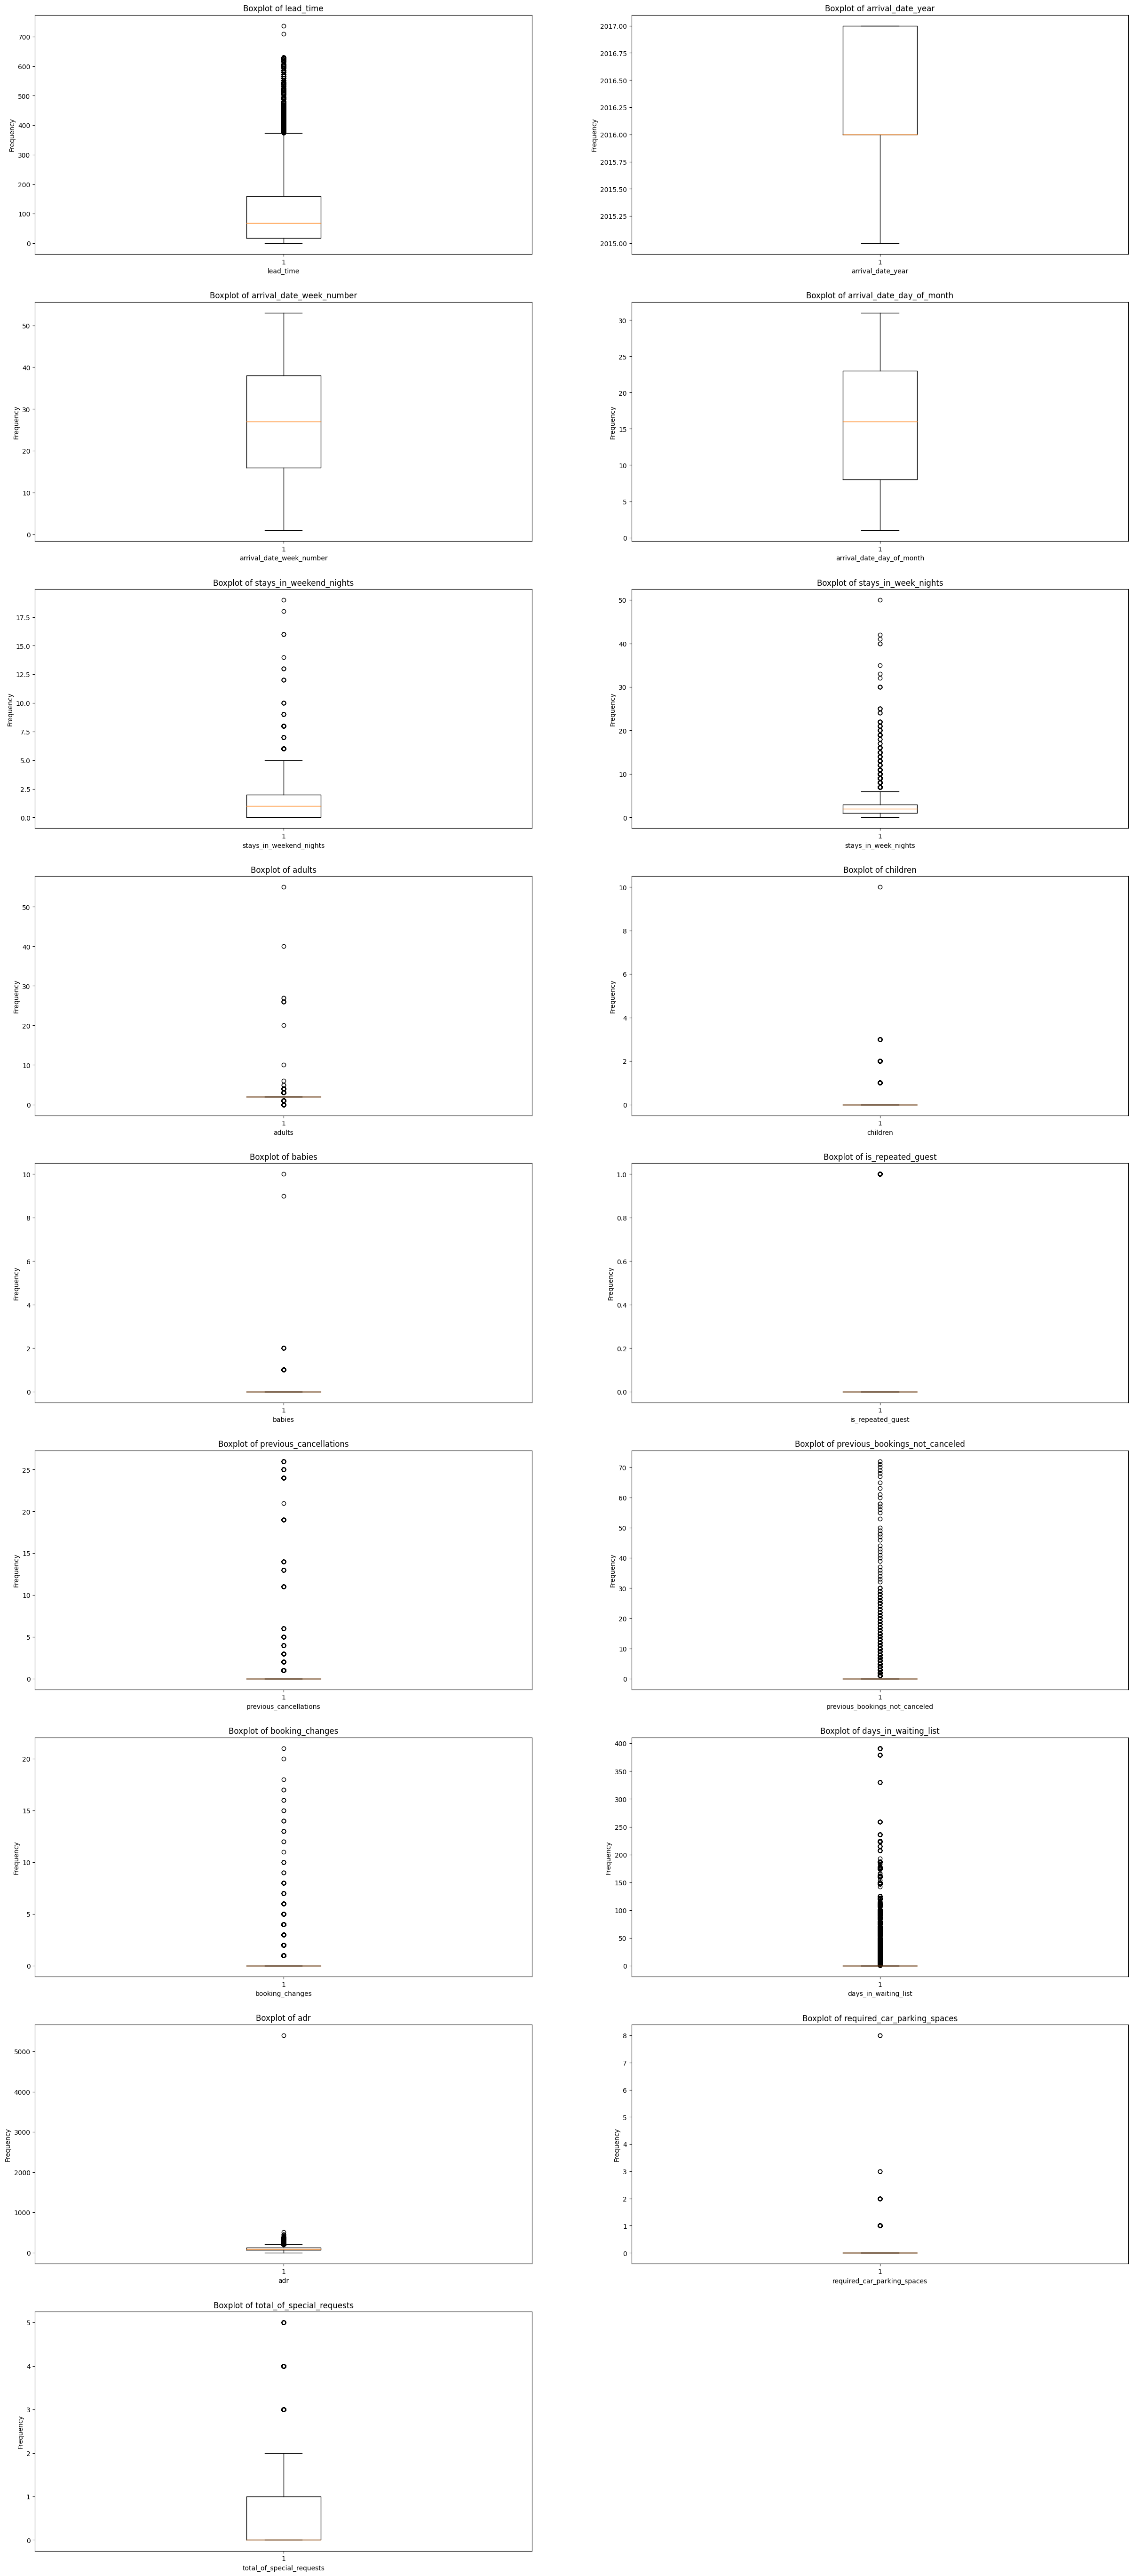

In [100]:
# Melihat boxplot dari semua kolom

x=2
y=int(round(len(num_columns)/2,0)+1)
z=1
plt.figure(figsize=(30,70))
for i in X_train[dataframe['Nama Kolom']]:
    plt.subplot(y,x,z)
    plt.boxplot(X_train[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of {i}')
    z+=1


Menurut penulis dari semua boxplot ini semua range datanya masih sangat logis, untuk kolom adults children babies, penulis rasa itu adalah sebuah rombongan yang 1 tahun sekali melakukan liburan. Bahkan untuk data yang lainnya bila dilakukan handling outlier akan hilang variablenya yang bernilai diatas 0. Oleh karena itu penulis tidak akan melakukan handling outlier terlebih dahulu, dan semua feature yang memiliki outlier ini belum tentu juga berkorelasi dengan dibatalkannya reservasi kamar hotel. Selanjutnya akan dilakukan scaling.

## Data Scaling

Karena dataset telah dilakukan drop atau trimming pada kolom akan di update nama kolomnya.

In [101]:
# Mendapatkan kolom numerical dan kolom kategorikal

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', num_columns)
print('Categorical Columns  : ', cat_columns)

Numerical Columns    :  ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Categorical Columns  :  ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


In [102]:
# Memisahkan data numerikal dengan kategorikal
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

# Melihat hasil pemisahan
X_train_num

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
85454,2,2016,12,17,0,1,1,0.0,0,0,0,1,0,0,79.00,0,1
22101,0,2016,12,17,0,1,2,0.0,0,0,0,0,1,0,45.00,0,0
55583,184,2016,34,17,0,1,2,0.0,0,0,0,0,3,0,139.50,0,1
40234,103,2015,29,18,2,1,2,0.0,0,0,0,0,0,0,94.50,0,0
85415,46,2016,11,10,2,3,2,0.0,0,0,0,0,0,0,77.35,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35112,84,2017,15,13,0,1,2,0.0,0,0,0,0,0,0,80.00,0,0
113043,108,2017,22,1,0,1,2,0.0,0,0,0,0,0,0,108.00,0,0
11495,233,2017,19,11,2,3,2,0.0,0,0,0,0,0,0,54.00,0,1
97294,346,2016,38,13,0,2,2,0.0,0,0,0,0,0,0,115.00,0,1


In [103]:
# Melihat data kategorikal
X_train_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
85454,City Hotel,March,BB,Corporate,Corporate,A,A,No Deposit,Transient
22101,Resort Hotel,March,BB,Direct,Direct,A,A,No Deposit,Transient
55583,City Hotel,August,HB,Online TA,TA/TO,A,A,No Deposit,Transient-Party
40234,City Hotel,July,HB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party
85415,City Hotel,March,BB,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...
35112,Resort Hotel,April,BB,Offline TA/TO,TA/TO,D,D,No Deposit,Transient
113043,City Hotel,June,SC,Online TA,TA/TO,A,A,No Deposit,Transient
11495,Resort Hotel,May,BB,Online TA,TA/TO,A,A,No Deposit,Transient
97294,City Hotel,September,HB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party


Data kategorikal dan numerikal sudah terpisah, dan bila ditelaah dari semua kolom kategorikal beserta sumber datanya.

In [104]:
# Mendeteksi tipe distribusi pada data numerikal

# Membuat list yang akan menampung nama kolom tergantung jenis distribusi
normal_dist= []
skewed_dist= []

# Fungsi loop yang digunakan untuk mendeteksi jenis distribusi data
for i in X_train_num.columns:
    
    # Fungsi if untuk menentukan apakah distribusi data skewed atau normal.

    if X_train_num[i].skew() > 0.5 or X_train_num[i].skew() < -0.5:
        skewed_dist.append(i)
        
    else:
        dist='Normal'
        normal_dist.append(i)

# Memisahkan kolom dari X_train_num
num_skewed = X_train_num[skewed_dist]
num_normal = X_train_num[normal_dist]
test_num_skewed = X_test_num[skewed_dist]
test_num_normal = X_test_num[normal_dist]        

print('Kolom dengan distribusi normal :', normal_dist)
print('Kolom dengan distribusi skewed :', skewed_dist)  

Kolom dengan distribusi normal : ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']
Kolom dengan distribusi skewed : ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


Telah didapatkan kolom mana saja yang memiliki distribusi data skewed atau normal, selanjutnya akan discaling menggunakan MinMaxScaler untuk distribusi skewed dan StandardScaler untuk distribusi normal.

In [105]:
# Melakukan scaling menggunakan MinMaxScaler untuk data skewed

scaler_skewed = MinMaxScaler()
scaler_skewed.fit(num_skewed)

# Transform data
num_s_scaled = scaler_skewed.transform(num_skewed)
test_num_s_scaled = scaler_skewed.transform(test_num_skewed)
num_s_scaled

array([[0.0027137 , 0.        , 0.02      , ..., 0.01579245, 0.        ,
        0.2       ],
       [0.        , 0.        , 0.02      , ..., 0.00950359, 0.        ,
        0.        ],
       [0.24966079, 0.        , 0.02      , ..., 0.02698293, 0.        ,
        0.2       ],
       ...,
       [0.31614654, 0.10526316, 0.06      , ..., 0.01116829, 0.        ,
        0.2       ],
       [0.46947083, 0.        , 0.04      , ..., 0.02245125, 0.        ,
        0.2       ],
       [0.03663501, 0.05263158, 0.06      , ..., 0.03341053, 0.        ,
        0.        ]])

Telah dilakukan scaling selanjutnya akan dilakukan scaling menggunakan StandarScaler untuk distribusi normal.

In [106]:
# Melakukan scaling menggunakan StandardScaler untuk data normal

scaler_normal = StandardScaler()
scaler_normal.fit(num_normal)

# Transform data
num_n_scaled = scaler_normal.transform(num_normal)
test_num_n_scaled = scaler_normal.transform(test_num_normal)
num_n_scaled

array([[-0.22335856, -1.11244734,  0.13869064],
       [-0.22335856, -1.11244734,  0.13869064],
       [-0.22335856,  0.50446017,  0.13869064],
       ...,
       [ 1.19083105, -0.59797677, -0.54467233],
       [-0.22335856,  0.79844336, -0.31688468],
       [ 1.19083105,  0.13698119,  0.13869064]])

Telah dilakukan scaling selanjutnya akan dilakukan proses encoding pada kolom kategorikal.

## Feature Encoding

In [107]:
# Melihat Data Kategorikal

X_train_cat.isnull().sum()

hotel                   0
arrival_date_month      0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
assigned_room_type      0
deposit_type            0
customer_type           0
dtype: int64

In [108]:
# Encoding menggunakan Ordinal Encoder dengan auto categorization karena
# hasil pengamatan tidak ada yang menghasilkan kategori ordinal

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=173)
encoder.fit(X_train_cat)
# Karena country terdapat 172  pada data train dimasukan nilai 173 untuk kategori yang tidak diketahui

# Transform data
X_train_cat_enc = encoder.transform(X_train_cat)
X_test_cat_enc = encoder.transform(X_test_cat)
X_train_cat_enc

array([[ 0.,  7.,  0., ...,  0.,  0.,  2.],
       [ 1.,  7.,  0., ...,  0.,  0.,  2.],
       [ 0.,  1.,  2., ...,  0.,  0.,  3.],
       ...,
       [ 1.,  8.,  0., ...,  0.,  0.,  2.],
       [ 0., 11.,  2., ...,  0.,  0.,  3.],
       [ 1.,  5.,  0., ...,  3.,  0.,  2.]])

Data telah berhasil di encode selanjutnya akan mendefinisikan model yang akan dipakai.

## Menyatukan seluruh kolom kembali

In [109]:
# Membuat kolom baru
cat_columns = X_train_cat.columns.tolist()
cat_columns

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [110]:
# Menyatukan kolom menjadi 1 dataframe untuk feature selection.

X_train_final = np.concatenate([num_n_scaled,num_s_scaled,X_train_cat_enc], axis = 1)
X_train_final_df = pd.DataFrame(X_train_final, columns = [normal_dist+skewed_dist+cat_columns])

# Karena terdeteksi ada data yang NaN pada test akan dilakukan imputing berdasarkan mode di train
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit(X_train_final_df)

# Mengubah kolom multi index menjadi single index untuk mempermudah indexing
X_train_final_df.columns = ['_'.join(col) for col in X_train_final_df.columns.values]
X_train_final_df.isnull().sum()

arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
dtype: int64

In [111]:
# Menyatukan kolom menjadi 1 dataframe untuk feature selection

X_test_final = np.concatenate([test_num_n_scaled,test_num_s_scaled,X_test_cat_enc], axis = 1)
X_test_final_df = pd.DataFrame(X_test_final, columns = [normal_dist+skewed_dist+cat_columns])

# Karena terdeteksi ada data yang nan akan dilakukan proses imputing berdasarkan data dengan count tertinggi
X_test_imp = imp_mode.transform(X_test_final_df)
X_test_imp_df = pd.DataFrame(X_test_imp, columns = X_test_final_df.columns)

# Mengubah kolom multi index menjadi single index untuk mempermudah indexing
X_test_imp_df.columns = ['_'.join(col) for col in X_test_imp_df.columns.values]
X_test_imp_df

,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,-0.223359,-1.038952,0.480372,0.081411,0.105263,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.015053,0.000,0.0,0.0,7.0,0.0,5.0,3.0,0.0,0.0,1.0,2.0
1,1.190831,-1.406431,1.049841,0.181818,0.000000,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.015053,0.000,0.0,0.0,3.0,0.0,4.0,3.0,0.0,0.0,0.0,3.0
2,1.190831,-0.891960,-0.089097,0.185889,0.052632,0.02,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.026151,0.000,0.2,0.0,0.0,0.0,6.0,3.0,3.0,3.0,0.0,2.0
3,1.190831,-1.847405,-0.886354,0.025780,0.105263,0.04,0.036364,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.026058,0.000,0.0,0.0,4.0,0.0,3.0,1.0,4.0,4.0,0.0,2.0
4,1.190831,-0.597977,-0.772460,0.164179,0.000000,0.06,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021156,0.000,0.0,0.0,8.0,3.0,6.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23871,1.190831,-1.185943,0.252584,0.032564,0.105263,0.02,0.036364,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.018406,0.000,0.0,1.0,7.0,1.0,6.0,3.0,0.0,2.0,0.0,2.0
23872,-0.223359,1.239418,1.163735,0.010855,0.000000,0.06,0.036364,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.018290,0.125,0.2,1.0,10.0,0.0,3.0,1.0,4.0,8.0,0.0,2.0
23873,-1.637548,0.651452,-1.683611,0.248304,0.000000,0.06,0.036364,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.018474,0.000,0.2,0.0,11.0,0.0,6.0,3.0,0.0,0.0,0.0,2.0
23874,-0.223359,1.165922,0.138691,0.321574,0.052632,0.06,0.036364,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.018003,0.000,0.4,0.0,10.0,0.0,6.0,3.0,0.0,1.0,0.0,2.0


In [112]:
# Melihat apakah ada nilai null atau tidak
X_test_imp_df.isnull().sum()

arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
dtype: int64

# Feature Selection

In [113]:
# Melakukan feature selection dengan bantuan fitur SelectKBest dan ANOVA untuk data numerikal


x = X_train_final_df[normal_dist+skewed_dist]
y = y_train

print('Ukuran data feature :', x.shape)

select = SelectKBest(score_func=f_classif, k=6 ) # Memilih 6 data terbarik dari x data
z1 = select.fit_transform(x,y)

print('Setelah memilih 6 fitur terbaik :', z1.shape)

filter = select.get_support() # Mengidentifikasi fitur terpilih
features = np.array(normal_dist+skewed_dist)

# Menarik data score dari hasil algoritma
score = select.scores_

# Membuat dictionary untuk penampilan data
res = dict(map(lambda i,j : (i,j) , features, score))
res_df= pd.DataFrame(res.values(), index = res.keys())
res_df.sort_values(0, ascending = False, inplace = True)

num_feature = features[filter] # Filter feature

print('Semua feature :')
print(res_df)
print('')
print('Selected best 6 :')
print(features[filter]) # 6 fitur terbaik


Ukuran data feature : (95504, 17)
Setelah memilih 6 fitur terbaik : (95504, 6)
Semua feature :
                                          0
lead_time                       8780.821796
total_of_special_requests       5569.777857
required_car_parking_spaces     3749.766919
booking_changes                 1997.706277
previous_cancellations          1179.701932
is_repeated_guest                665.185506
adults                           361.855947
previous_bookings_not_canceled   310.097962
days_in_waiting_list             266.104228
adr                              225.042844
babies                            95.818079
stays_in_week_nights              59.869881
arrival_date_year                 22.077518
arrival_date_week_number           8.727982
arrival_date_day_of_month          2.475372
children                           1.657574
stays_in_weekend_nights            0.282188

Selected best 6 :
['lead_time' 'is_repeated_guest' 'previous_cancellations'
 'booking_changes' 'required_car_par

Karena ada 6 nilai diatas 1000 maka dipilih 6 features tersebut untuk kolom numerikal, selanjutnya akan dilakukan feature selection untuk kolom kategorikal dengan bantuan scoring Chi2 dengan feature selection SelectKBest

In [114]:
# Melakukan feature selection dengan bantuan fitur SelectKBest dan Chi2 untuk data kategorikal

x = X_train_final_df[cat_columns]
y = y_train

print('Ukuran data feature :', x.shape)

select = SelectKBest(score_func=chi2, k=4 ) # Memilih 4 data terbarik dari x data
z2 = select.fit_transform(x,y)

print('Setelah memilih 4 fitur terbaik :', z2.shape)

filter = select.get_support() # Mengidentifikasi fitur terpilih
features = np.array(cat_columns)

# Menarik data score dari hasil algoritma
score = select.scores_

# Membuat dictionary untuk penampilan data
res = dict(map(lambda i,j : (i,j) , features, score))
res_df= pd.DataFrame(res.values(), index = res.keys())
res_df.sort_values(0, ascending = False, inplace = True)

cat_feature = features[filter] # Filter feature

print('Semua feature :')
print(res_df)
print('')
print('Selected best 4 :')
print(features[filter]) # 4 fitur terbaik


Ukuran data feature : (95504, 9)
Setelah memilih 4 fitur terbaik : (95504, 4)
Semua feature :
                                 0
deposit_type          18823.460583
assigned_room_type     7677.300323
hotel                  1131.077860
reserved_room_type      998.509942
distribution_channel    835.646043
market_segment          106.584950
customer_type            71.369154
meal                     67.011002
arrival_date_month        0.937342

Selected best 4 :
['hotel' 'reserved_room_type' 'assigned_room_type' 'deposit_type']


Karena ada 5 nilai diatas 1000 maka dipilih 4 features tersebut untuk kolom kategorikal, selanjutnya akan dilakukan pemisahan kolom yang terpilih.

In [115]:
# Membuat list baru untuk filtering feature pada train dan test set.
new_array = num_feature.astype(object).tolist()+ cat_feature.astype(object).tolist()
new_array

['lead_time',
 'is_repeated_guest',
 'previous_cancellations',
 'booking_changes',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type']

In [128]:
new_array_df = pd.DataFrame(new_array)
new_array_df = new_array_df.rename(columns = {0:'Feature Name'})
new_array_df

,Feature Name
0,lead_time
1,is_repeated_guest
2,previous_cancellations
3,booking_changes
4,required_car_parking_spaces
5,total_of_special_requests
6,hotel
7,reserved_room_type
8,assigned_room_type
9,deposit_type


In [143]:
# Memisahkan feature yang terpilih pada dataframe baru
X_train_selected = X_train_final_df[new_array]
X_test_selected = X_test_imp_df[new_array]

X_train_selected

,lead_time,is_repeated_guest,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,hotel,reserved_room_type,assigned_room_type,deposit_type
0,0.225237,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0
1,0.375848,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.0
2,0.236092,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
3,0.189959,0.0,0.0,0.0,0.000,0.2,0.0,0.0,0.0,0.0
4,0.025780,0.0,0.0,0.0,0.000,0.2,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95499,0.164179,0.0,0.0,0.0,0.125,0.0,1.0,6.0,6.0,0.0
95500,0.375848,0.0,0.0,0.0,0.000,0.2,0.0,0.0,0.0,0.0
95501,0.132972,0.0,0.0,0.0,0.000,0.2,0.0,3.0,3.0,0.0
95502,0.021710,0.0,0.0,0.0,0.125,0.2,1.0,6.0,6.0,0.0


In [144]:
# Mendeteksi tipe distribusi pada data selected

# Membuat list yang akan menampung nama kolom tergantung jenis distribusi
normal_dist_selected= []
skewed_dist_selected= []

# Fungsi loop yang digunakan untuk mendeteksi jenis distribusi data
for i in X_train_selected[num_feature].columns:
    
    # Fungsi if untuk menentukan apakah distribusi data skewed atau normal.

    if X_train_selected[i].skew() > 0.5 or X_train_selected[i].skew() < -0.5:
        skewed_dist_selected.append(i)
        
    else:
        dist='Normal'
        normal_dist_selected.append(i)

# Memisahkan kolom dari X_train_selected
selected_skewed = X_train_selected[skewed_dist_selected]
selected_normal = X_train_selected[normal_dist_selected]
test_selected_skewed = X_test_selected[skewed_dist_selected]
test_selected_normal = X_test_selected[normal_dist_selected]        

print('Kolom dengan distribusi normal :', normal_dist_selected)
print('Kolom dengan distribusi skewed :', skewed_dist_selected)  

Kolom dengan distribusi normal : []
Kolom dengan distribusi skewed : ['lead_time', 'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']


Feature telah terpilih selanjutnya akan dilakukan pendefinisian model.

# 6. Model Definition

## Decision Tree

In [145]:
# Mendefinisikan model DecisionTreeClassifier

dc = DecisionTreeClassifier(random_state=10)

## Logistic Regression

In [146]:
# Mendefinisikan model LogisticRegression

lg = LogisticRegression(max_iter = 200,random_state=10)

## Random Forest

In [147]:
# Mendefinisikan model RandomForestClassifier

rf = RandomForestClassifier(random_state=10)

## KNN

In [148]:
# Mendefinisikan model KNeighborsClassifier

knn = KNeighborsClassifier()

Semua model yang didefinisikan akan menggunakan hyperparameter default, Pada model training akan dilakukan beberapa model dengan hyperparameter tertentu.

Decision tree dan random forest dipilih karena dataset memiliki data kategorikal dan numerikal yang tinggi, dan 2 model tersebut  mampu mengolah kedua jenis data dengan baik.

KNN dipilih karena model tersebut dapat melakukan clustering dengan baik menggunakan data numerikal, Model ini mempertimbangkan klasifikasi berdasarkan jarak dari poin-poin data. Dan model ini sangat baik untuk mengamati karakteristik data yang mirip.

Logistic Regression dipilih karena target yang dibutuhkan dari projek ini bersifat binary yaitu apakah konsumen akan melakukan pembatalan reservasi atau tidak, dan logistic regression, model ini memprediksi dengan bantuan historical data yang dimana dataset ini memiliki cukup banyak oleh karena itu digunakan model ini.



# 7. Model Training

In [149]:
# Melatih Model DecisionTreeClassifier

dc.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=10)

In [150]:
# Mendefinisikan model DecisionTreeClassifier ke 2

dc2 = DecisionTreeClassifier(min_samples_leaf = 2, min_samples_split = 3, random_state=10 )

# Melatih Model DecisionTreeClassifier

dc2.fit(X_train_selected, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=3, random_state=10)

In [151]:
# Melatih Model Random Forest

rf.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=10)

In [152]:
# Mendefinisikan model Random Forest 2
rf2 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 3, random_state=10)

# Melatih model Random Forest 2
rf2.fit(X_train_selected, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200, random_state=10)

In [153]:
# Melatih Model KNearestNeighbors

knn.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [154]:
# Mendefinisikan model KNearestNeighbors 2
knn2 = KNeighborsClassifier(n_neighbors = 10)

# Melatih model KNearestNeighbors 2
knn2.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=10)

In [155]:
# Melatih Model Logistic Regression

lg.fit(X_train_selected, y_train)

LogisticRegression(max_iter=200, random_state=10)

In [156]:
# Mendefinisikan model Logistic Regression 2
lg2 = LogisticRegression(solver='newton-cg', max_iter=300, random_state=10)

# Melatih model Logistic Regression 2
lg2.fit(X_train_selected, y_train)

LogisticRegression(max_iter=300, random_state=10, solver='newton-cg')

# 8. Model Evaluation

Dilakukan cross-validation antara model menggunakan nilai F1 Score karena data imbalance, sehingga meskipun akurasi nya tinggi model akan menghasilkan data yang kurang tepat. Karena F1 score merupakan nilai harmonic rata-rata dari recall dan akurasi metrik ini lebih baik untuk judgement data imbalance.

In [157]:
# Prediksi Model Decision Tree
y_pred_dc = dc.predict(X_train_selected)

# Cross Validation untuk model Decision Tree

F1_score_train_cross_val = cross_val_score(dc, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67168509 0.68049468 0.68058778 0.68127019 0.67579409]
F1 Score - Mean - Cross Validation :  0.6779663656972934
F1 Score - Std - Cross Validation  :  0.0036973671621796556
F1 Score - Range of Set       :  0.6742689985351138 - 0.681663732859473


In [158]:
# Membuat dataframe yang akan menyimpan nilai score
all_reports = pd.DataFrame()

# Menyimpan score evaluasi pada dataframe score
score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_dc),
}
all_reports['Decision Tree 1'] = score_reports
all_reports

,Decision Tree 1
train - mean CV,0.677966
train - Std CV,0.003697
train - F1_score,0.768392


In [159]:
# Prediksi Model Decision Tree 2
y_pred_dc2 = dc2.predict(X_train_selected)

# Cross Validation untuk model Decision Tree 2

F1_score_train_cross_val = cross_val_score(dc2, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67421464 0.67954835 0.67856862 0.67986588 0.6724877 ]
F1 Score - Mean - Cross Validation :  0.6769370360083049
F1 Score - Std - Cross Validation  :  0.0030088933397076512
F1 Score - Range of Set       :  0.6739281426685972 - 0.6799459293480126


In [160]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_dc2),
}
all_reports['Decision Tree 2'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2
train - mean CV,0.677966,0.676937
train - Std CV,0.003697,0.003009
train - F1_score,0.768392,0.749429


In [161]:
# Prediksi Model Random Forest
y_pred_rf = rf.predict(X_train_selected)

# Cross Validation untuk model Random Forest

F1_score_train_cross_val = cross_val_score(rf, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67831625 0.69270314 0.69129408 0.68900701 0.68364984]
F1 Score - Mean - Cross Validation :  0.6869940630813476
F1 Score - Std - Cross Validation  :  0.005322104566134471
F1 Score - Range of Set       :  0.6816719585152131 - 0.692316167647482


In [162]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_rf),
}
all_reports['Random Forest 1'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1
train - mean CV,0.677966,0.676937,0.686994
train - Std CV,0.003697,0.003009,0.005322
train - F1_score,0.768392,0.749429,0.772964


In [163]:
# Prediksi Model Random Forest 2
y_pred_rf2 = rf2.predict(X_train_selected)

# Cross Validation untuk model Random Forest 2

F1_score_train_cross_val = cross_val_score(rf2, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.68234724 0.68670632 0.69054647 0.69238141 0.6830447 ]
F1 Score - Mean - Cross Validation :  0.6870052271195837
F1 Score - Std - Cross Validation  :  0.0039728001109458335
F1 Score - Range of Set       :  0.6830324270086379 - 0.6909780272305295


In [164]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_rf2),
}
all_reports['Random Forest 2'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2
train - mean CV,0.677966,0.676937,0.686994,0.687005
train - Std CV,0.003697,0.003009,0.005322,0.003973
train - F1_score,0.768392,0.749429,0.772964,0.732356


In [165]:
# Prediksi Model KNN
y_pred_knn = knn.predict(X_train_selected)

# Cross Validation untuk model KNN

F1_score_train_cross_val = cross_val_score(knn, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.67154063 0.67105465 0.66867925 0.67503972 0.66555513]
F1 Score - Mean - Cross Validation :  0.6703738752130661
F1 Score - Std - Cross Validation  :  0.0031523615776432004
F1 Score - Range of Set       :  0.6672215136354229 - 0.6735262367907093


In [166]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_rf2),
}
all_reports['KNN 1'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356


In [167]:
# Prediksi Model KNN 2
y_pred_knn2 = knn2.predict(X_train_selected)

# Cross Validation untuk model KNN 2

F1_score_train_cross_val = cross_val_score(knn2, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66226804 0.66475222 0.66801816 0.66584484 0.66058664]
F1 Score - Mean - Cross Validation :  0.6642939799906239
F1 Score - Std - Cross Validation  :  0.0026204383355251633
F1 Score - Range of Set       :  0.6616735416550987 - 0.6669144183261491


In [168]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_knn2),
}
all_reports['KNN 2'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1,KNN 2
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374,0.664294
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152,0.002620
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356,0.698688


In [169]:
# Prediksi Model Logistic Regression
y_pred_lg = lg.predict(X_train_selected)

# Cross Validation untuk model Logistic Regression

F1_score_train_cross_val = cross_val_score(lg, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.5499952  0.55049237 0.55519604 0.55728026 0.55804209]
F1 Score - Mean - Cross Validation :  0.5542011923592518
F1 Score - Std - Cross Validation  :  0.003366559492996986
F1 Score - Range of Set       :  0.5508346328662548 - 0.5575677518522488


In [170]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_lg),
}
all_reports['Logistic Regression 1'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1,KNN 2,Logistic Regression 1
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374,0.664294,0.554201
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152,0.002620,0.003367
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356,0.698688,0.556217


In [171]:
# Prediksi Model Logistic Regression 2
y_pred_lg2 = lg2.predict(X_train_selected)

# Cross Validation untuk model Logistic Regression 2

F1_score_train_cross_val = cross_val_score(lg2, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', F1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', F1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', F1_score_train_cross_val.std())
print('F1 Score - Range of Set       : ', (F1_score_train_cross_val.mean()-F1_score_train_cross_val.std()) , '-', (F1_score_train_cross_val.mean()+F1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.5499952  0.55049237 0.55519604 0.55728026 0.55804209]
F1 Score - Mean - Cross Validation :  0.5542011923592518
F1 Score - Std - Cross Validation  :  0.003366559492996986
F1 Score - Range of Set       :  0.5508346328662548 - 0.5575677518522488


In [172]:
# Menyimpan score evaluasi pada dataframe score

score_reports = {
    'train - mean CV' : F1_score_train_cross_val.mean(),
    'train - Std CV' : F1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_lg2),
}
all_reports['Logistic Regression 2'] = score_reports
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1,KNN 2,Logistic Regression 1,Logistic Regression 2
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374,0.664294,0.554201,0.554201
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152,0.002620,0.003367,0.003367
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356,0.698688,0.556217,0.556217


Overall dari hasil crossvalidation data train, model dengan hasil terbaik diraih oleh model decision tree dan random forest. Selanjutnya penulis akan melakukan testing ke data test menggunakan 4 model tersebut.

## Prediksi Test

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     15143
           1       0.76      0.61      0.68      8733

    accuracy                           0.79     23876
   macro avg       0.78      0.75      0.76     23876
weighted avg       0.79      0.79      0.78     23876



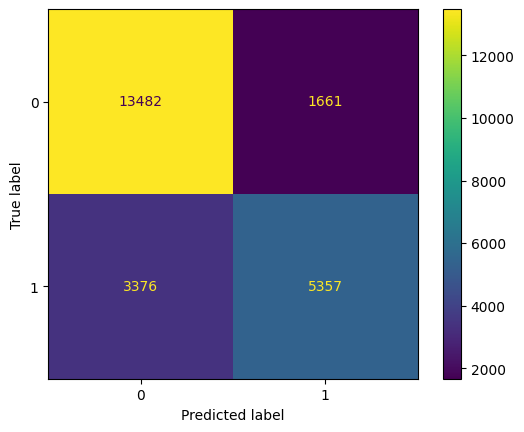

In [173]:
# Prediksi Data test menggunakan model Decision Tree

y_pred_test_dc = dc.predict(X_test_selected)

# Melakukan Evaluasi Dengan Bantuan Confusion Matrix

cm_test_dc = confusion_matrix(y_test, y_pred_test_dc)

# Membuat Plot Confusion Matrix agar hasil prediksi terlihat sebarannya

ConfusionMatrixDisplay(cm_test_dc).plot()

# Evaluasi Model Dengan Bantuan Classification Report untuk test Set

print(classification_report(y_test, y_pred_test_dc))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     15143
           1       0.78      0.60      0.68      8733

    accuracy                           0.79     23876
   macro avg       0.79      0.75      0.76     23876
weighted avg       0.79      0.79      0.79     23876



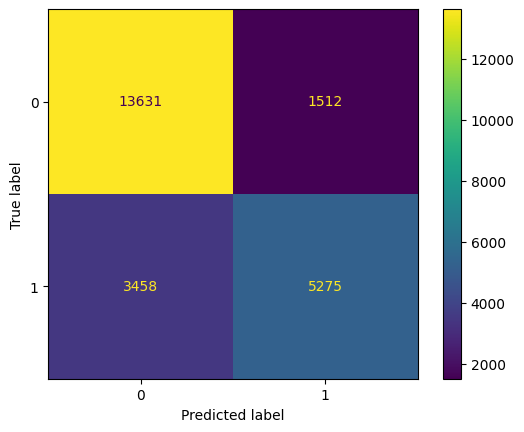

In [174]:
# Prediksi Data test menggunakan model Decision Tree 2

y_pred_test_dc2 = dc2.predict(X_test_selected)

# Melakukan Evaluasi Dengan Bantuan Confusion Matrix

cm_test_dc2 = confusion_matrix(y_test, y_pred_test_dc2)

# Membuat Plot Confusion Matrix agar hasil prediksi terlihat sebarannya

ConfusionMatrixDisplay(cm_test_dc2).plot()

# Evaluasi Model Dengan Bantuan Classification Report untuk test Set

print(classification_report(y_test, y_pred_test_dc2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     15143
           1       0.76      0.63      0.69      8733

    accuracy                           0.79     23876
   macro avg       0.78      0.76      0.77     23876
weighted avg       0.79      0.79      0.79     23876



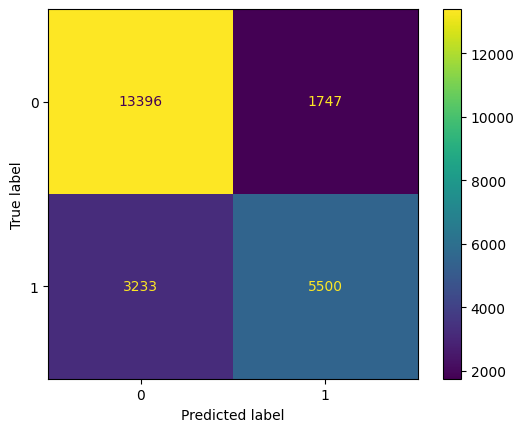

In [175]:
# Prediksi Data test menggunakan model Random Forest

y_pred_test_rf = rf.predict(X_test_selected)

# Melakukan Evaluasi Dengan Bantuan Confusion Matrix

cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Membuat Plot Confusion Matrix agar hasil prediksi terlihat sebarannya

ConfusionMatrixDisplay(cm_test_rf).plot()

# Evaluasi Model Dengan Bantuan Classification Report untuk test Set

print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     15143
           1       0.80      0.61      0.69      8733

    accuracy                           0.80     23876
   macro avg       0.80      0.76      0.77     23876
weighted avg       0.80      0.80      0.79     23876



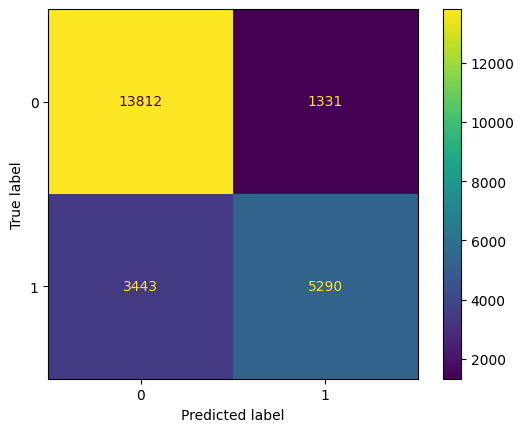

In [176]:
# Prediksi Data test menggunakan model Random Forest 2

y_pred_test_rf2 = rf2.predict(X_test_selected)

# Melakukan Evaluasi Dengan Bantuan Confusion Matrix

cm_test_rf2 = confusion_matrix(y_test, y_pred_test_rf2)

# Membuat Plot Confusion Matrix agar hasil prediksi terlihat sebarannya

ConfusionMatrixDisplay(cm_test_rf2).plot()

# Evaluasi Model Dengan Bantuan Classification Report untuk test Set

print(classification_report(y_test, y_pred_test_rf2))

In [177]:
# Melihat kembali nilai f1 score dari semua model
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1,KNN 2,Logistic Regression 1,Logistic Regression 2
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374,0.664294,0.554201,0.554201
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152,0.002620,0.003367,0.003367
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356,0.698688,0.556217,0.556217


Dari semua hasil prediksi test model memiliki hasil yang sama yaitu 100%, yang berarti model ini good fit karena hasil train dan test nya sangat mirip. Untuk memilih model yang terbaik penulis akan menggunakan waktu model belajar dan melakukan prediksi. Yang dimana decision tree baseline karena ternyata penjabaran hyperparameter tidak terlalu mengubah hasil prediksinya dan model random forest memakan waktu yang lebih lama untuk pembelajaran dan prediksi. 


Selanjutnya penulis akan melakukan proses model tuning pada model logistic regression karena hasilnya hampir 100% dan model tersebut memiliki waktu yang cukup cepat untuk mempelajari dan memprediksi data. Ditambah logistic regression yang penulis definisikan hyperparameternya tidak mengalami kenaikan maupun penurunan. Maka akan dilakukan tuning menggunakan GridSearchCV

## Model Tuning

In [178]:
# Melakukan definisi hyperparemer yang akan di tuning
penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg','lbfgs','liblinear']
max_iter = [450,500]
param_grid = {
    'penalty'       : penalty,
    'solver'        : solver,
    'max_iter'      : max_iter,
    'random_state'  : [10]
}

param_grid

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'max_iter': [450, 500],
 'random_state': [10]}

In [179]:
# Tuning menggunakan GridSearchCV untuk model logistic regression

lg_grid = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=param_grid,
                                verbose = 1,
                                cv=3,
                                n_jobs=1,
                                scoring='f1')
lg_grid.fit(X_train_selected, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\toshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\toshi\AppData\Local\Programs\Pytho

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'max_iter': [450, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1', verbose=1)

In [180]:
# Melihat best parameter

lg_grid.best_estimator_

LogisticRegression(max_iter=450, penalty='none', random_state=10)

Ternyata hanya max iter nya saja yang berubah, sisanya sesuai dengan default.

In [181]:
# Get Best Estimator

lg_grid_best = lg_grid.best_estimator_

In [182]:
# Cross Validation untuk train set

f1_score_train_cross_val = cross_val_score(lg_grid_best, 
                                           X_train_selected, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('f1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('f1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('f1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('f1 Score - Range of Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

f1 Score - All - Cross Validation  :  [0.56528388 0.56417138 0.56896715 0.57175312 0.5724014 ]
f1 Score - Mean - Cross Validation :  0.5685153873809012
f1 Score - Std - Cross Validation  :  0.003319672746969476
f1 Score - Range of Set       :  0.5651957146339318 - 0.5718350601278707


In [183]:
# Menyimpan score evaluasi pada dataframe score

# Check Performance Model against Train-Set

y_pred_train = lg_grid_best.predict(X_train_selected)

# Membuat dictionary untuk menyimpan score

score_reports = {
    'train - mean CV' : f1_score_train_cross_val.mean(),
    'train - Std CV' : f1_score_train_cross_val.std(),
    'train - F1_score' : f1_score(y_train, y_pred_train)
}
all_reports['Logistic Regression Grid'] = score_reports
all_reports


,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1,KNN 2,Logistic Regression 1,Logistic Regression 2,Logistic Regression Grid
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374,0.664294,0.554201,0.554201,0.568515
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152,0.002620,0.003367,0.003367,0.003320
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356,0.698688,0.556217,0.556217,0.568822


Ternyata hasil tuning sama saja dengan hasil yang penulis tentukan parameternya, oleh karena itu model yang akan penulis gunakan untuk projek ini adalah decision tree default. Selanjutnya model akan disimpan untuk deployment

In [184]:
# Membuat list kolom apa saja yang akan di drop oleh columntransformer
# Dilakukan disini agar list kolom bisa di save untuk deployment

kolom_drop = X_train_final_df.columns.tolist()
kolom_drop = [i for i in kolom_drop if i not in new_array]
kolom_drop, len(kolom_drop)

(['arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'previous_bookings_not_canceled',
  'days_in_waiting_list',
  'adr',
  'arrival_date_month',
  'meal',
  'market_segment',
  'distribution_channel',
  'customer_type'],
 16)

# 9. Model Saving

In [185]:
# Menyimpan files untuk digunakan di deployment

with open('model_decision_tree.pkl', 'wb') as file_1:
  joblib.dump(dc, file_1)

with open('model_scaler_skewed.pkl', 'wb') as file_2:
  joblib.dump(scaler_skewed, file_2)

with open('model_scaler_normal.pkl', 'wb') as file_3:
  joblib.dump(scaler_normal, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  joblib.dump(encoder, file_4)

with open('list_num_normal.txt', 'w') as file_5:
  json.dump(normal_dist, file_5)

with open('list_num_skewed.txt', 'w') as file_6:
  json.dump(skewed_dist, file_6)

with open('list_cat_cols.txt', 'w') as file_7:
  json.dump(cat_columns, file_7)

with open('list_drop_cols.txt', 'w') as file_8:
  json.dump(kolom_drop, file_8)


Model telah berhasil disimpan. Selanjutnya akan dilakukan inference. Untuk inferencing penulis akan menggunakan pipeline.

# 10. Model Inference

In [186]:
# Membuat Pipeline
# Mendefinisikan Class OutletTypeEncoder
# Class ini akan dijadikan encoder khusus yang digunakan dataset ini dengan temuan EDA penulis
# Encoder ini harus mempunyai fit_transform.
class CustomTransformer(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        df = df.drop('reservation_status_date', axis =1)
        df = df.drop({'agent','company'},axis = 1)
        df['children'].fillna(df['children'].mean(), inplace=True)
        
        return df
        
# Mendefinisikan pipeline untuk preprocessing data numerikal distribusi normal
num_n_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', scaler_normal)
])

# Mendefinisikan pipeline untuk preprocessing data numerikal distribusi skewed
num_s_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('minmax_scaler', scaler_skewed)
])

# Mendefinisikan pipeline untuk preprocessing data kategorikal
preprocess_pipeline = ColumnTransformer(transformers =[
    ('num_skew', num_s_pipeline, skewed_dist),
    ('num_norm', num_n_pipeline, normal_dist),
    ('categorical', encoder, cat_columns),
    ('drop_columns', 'drop', kolom_drop),  
])

# Mendefinisikan pipeline inti
model_pipeline = Pipeline(steps=[('get_overall_cleaning_columns', CustomTransformer()), 
                                 ('pre_processing',preprocess_pipeline),
                                 ('decision_tree', dc)
                                 ])

# Melakukan train pada pipeline menggunakan data yang sudah dicopy

model_pipeline.fit(X_train_pipe, y_train_pipe)

Pipeline(steps=[('get_overall_cleaning_columns', CustomTransformer()),
                ('pre_processing',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'pre...
                                                  ['arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_bookings_not_canceled',
                                                   'days_in_waiting_list',
                                                   'adr', 'arrival_date_month',
                                                   'meal', 'market_segment',
                                                   'distribution_channel',
                                                   'customer_type'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=10))])

In [187]:
# Melakukan saving model pipeline untuk digunakan pada deployment

with open('num_n_pipeline.pkl', 'wb') as file_10:
    pickle.dump(num_n_pipeline, file_10)

with open('num_s_pipeline.pkl', 'wb') as file_11:
    pickle.dump(num_s_pipeline, file_11)

with open('preprocess_pipeline.pkl', 'wb') as file_12:
    pickle.dump(preprocess_pipeline, file_12)

with open('model_pipeline.pkl', 'wb') as file_13:
    pickle.dump(model_pipeline, file_13)

Pipeline berhasil belajar data train. Selanjutnya akan penulis evaluasi menggunakan data inference dengan metrics confusion metrics dan classification score. Yang dilihat adalah F1 scorenya karena data imbalance.

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



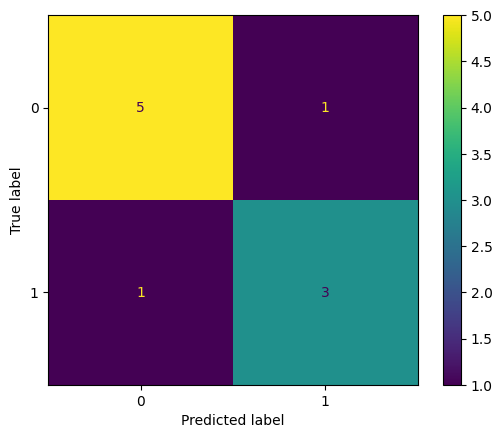

In [188]:
# Prediksi Data inf menggunakan model Random Forest 2

y_pred_inf_model_pipeline = model_pipeline.predict(X_inf)

# Melakukan Evaluasi Dengan Bantuan Confusion Matrix

cm_inf_model_pipeline = confusion_matrix(y_inf, y_pred_inf_model_pipeline)

# Membuat Plot Confusion Matrix agar hasil prediksi terlihat sebarannya

ConfusionMatrixDisplay(cm_inf_model_pipeline).plot()

# Evaluasi Model Dengan Bantuan Classification Report untuk inf Set

print(classification_report(y_inf, y_pred_inf_model_pipeline))

Hasil prediksi sangat memuaskan yang dimana 100% terprediksi dengan akurat. Bisa dibilang model ini sangat baik untuk melakukan prediksi apakah konsumen akan membatalkan reservasi kamar hotel. Karena performa train, test dan inference nya 100% semua.

# 11. Kesimpulan

Kesimpulan dari EDA semua data numerik tidak ada yang terlalu berkorelasi dengan pembatalannya reservasi di hotel. Namun dapat ditarik kesimpulan 

-  Semakin lama jarak tanggal booking dengan tanggal check-in nya. Semakin rawan dibatalkan reservasi.
-  Semakin lama reservasi dimasukan ke waiting list semakin besar reservasi dibatalkan.
-  Jumlah orang dewasa balita dan anak anak tidak terlalu berpengaruh pada pembatalannya reservasi.
-  Semakin banyak riwayat pembatalan semakin tinggi kemungkinan konsumen tersebut akan melakukan pembatalan pada reservasi.
-  Anehnya konsumen yang sering mengganti jadwal reservasi malah berkemungkinan tinggi tidak melakukan pembatalan.
- Untuk per tahunnya kebanyakan konsumen menginap di hotel pada minggu ke 33.


Saat Dilakukan train-test split, karena kategori country sangat banyak jumlahnya, penulis coba untuk di stratify, namun membuat distribusi class target yang jelek. Oleh karena itu di drop column nya.



In [189]:
# Melihat Score
all_reports

,Decision Tree 1,Decision Tree 2,Random Forest 1,Random Forest 2,KNN 1,KNN 2,Logistic Regression 1,Logistic Regression 2,Logistic Regression Grid
train - mean CV,0.677966,0.676937,0.686994,0.687005,0.670374,0.664294,0.554201,0.554201,0.568515
train - Std CV,0.003697,0.003009,0.005322,0.003973,0.003152,0.002620,0.003367,0.003367,0.003320
train - F1_score,0.768392,0.749429,0.772964,0.732356,0.732356,0.698688,0.556217,0.556217,0.568822


Pada umumnya semua model menghasilkan nilai yang sangat bagus,Random Forest juga menghasilkan  nilai yang hampir sempurna namun waktu yang dibutuhkan random forest untuk predict dan training lebih lama dari Decision Tree, dan score nya pun kalah. Dalam segi waktu dan F1 score decision tree lah yang paling unggul. 

Yang dimana prediksi train, test dan inference nya 100%. Oleh karena itu digunakan model Decision Tree dengan bantuan metrics classification report, confusion matrix dan F1 score

Artinya model tersebut mampu mengklasifikasikan apakah customer akan membatalkan reservasinya di hotel dengan sangat baik.

Pipeline yang dibuat penulis berhasil melakukan data preprocessing inference dari data murni sampai predict secara langsung, dan modelnya menggunakan model Decision Tree baseline.

In [190]:
# Melihat Model Pipeline

model_pipeline

Pipeline(steps=[('get_overall_cleaning_columns', CustomTransformer()),
                ('pre_processing',
                 ColumnTransformer(transformers=[('num_skew',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'pre...
                                                  ['arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'previous_bookings_not_canceled',
                                                   'days_in_waiting_list',
                                                   'adr', 'arrival_date_month',
                                                   'meal', 'market_segment',
                                                   'distribution_channel',
                                                   'customer_type'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=10))])

OutletTypeEncoder adalah transformer khusus untuk dataset ini, yang dimana berdasarkan personal judgement penulis ada beberapa kolom/data yang harus dihapus/diimputasi karena berkemungkinan besar akan membuat model tidak bagus. Setelah itu data akan dilakukan scaling.N

Num_skew dan num_norm adalah scaler untuk distribusi data skewed dan normal, setelah di scaling dilakukan encoding dengan ordinal scale karena menggunakan onehotencoder terlalu banyak categorinya jadi kolom terbentuk terlalu banyak. 

Setelah dilakukan encoding beberapa feature akan di drop, ini berdasarkan hasil feature selection menggunakan scoring ANOVA untuk data numerik dan Chi2 untuk data kategorik. Feature yang memiliki score diatas 1000 saja yang penulis bawa.

Setelah featur scaling, data akan di pelajari oleh model decision tree classifier, untuk fit digunakan X_train dan y_train yang masih format asli lalu dilakukan prediksi pada data inference, yang menghasilkan nilai 100 semua dan pengolahan data nya pun sangat cepat untuk mengolah X_train dan y_train dalam 1.2 detik saja.

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



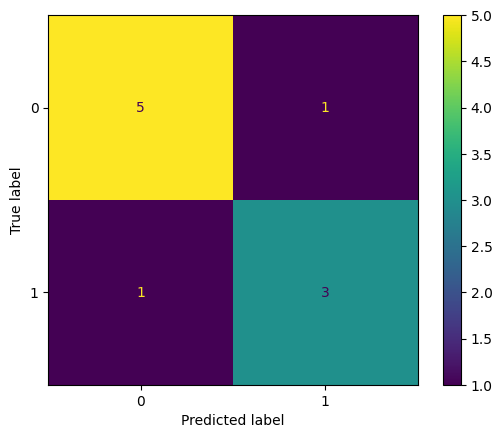

In [191]:
# Plot Confusion Matrix hasil prediksi Pipeline

ConfusionMatrixDisplay(cm_inf_model_pipeline).plot()

# Classification report dari hasil prediksi Pipeline

print(classification_report(y_inf, y_pred_inf_model_pipeline))

In [192]:
new_array

['lead_time',
 'is_repeated_guest',
 'previous_cancellations',
 'booking_changes',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type']

Ternyata feature yang sangat berkorelasi dengan kustomer membatalkan atau tidak reservasinya adalah. Jarak Booking dengan kedatangan, tahun status reservasi, jumlah pergantian jadwal, jenis hotel, kebutuhan parkir, total request yang khusus, jenis kamar dan kamar yang didapatkan.

Overall objective perusahaan tercapai karena model mampu memprediksi dataset keseluruhan dengan sangat baik yaitu akurasi 100% di train, test dan inference. Sekarang perusahaan lebih mampu melakukan antisipasi untuk customer-customer tertentu yang berkemungkinan besar membatalkan reservasi.